In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [17]:
# Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(boston_url)
df



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [18]:

# Question 1: Is there a significant difference in the median value of houses bounded by the Charles River or not?

# Separate data for houses bounded by the Charles River and those not bounded
charles_river_yes = df[df['CHAS'] == 1]['MEDV']
charles_river_no = df[df['CHAS'] == 0]['MEDV']


In [19]:

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(charles_river_yes, charles_river_no)

# Print the result
print("Question 1:")
print("T-statistic:", t_stat)
print("P-value:", p_value)
print("")


Question 1:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05



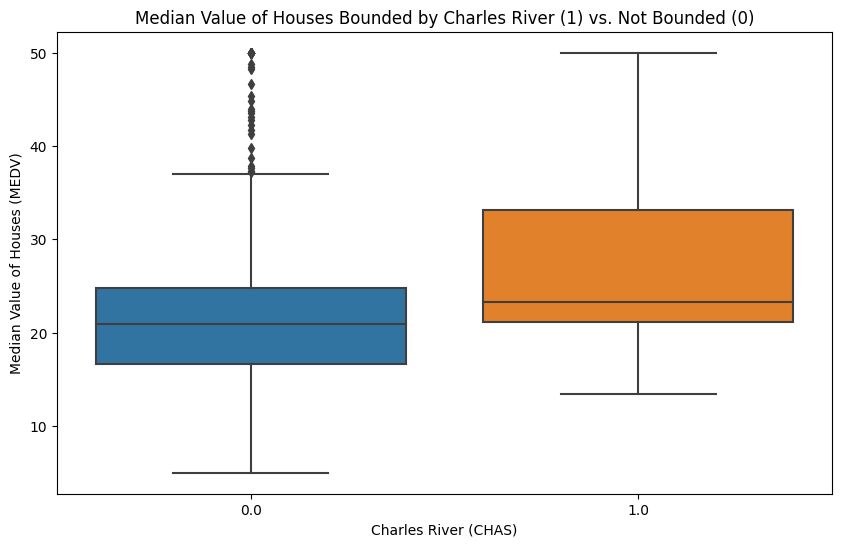

In [20]:

# Visualize the data using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CHAS'], y=df['MEDV'])
plt.xlabel('Charles River (CHAS)')
plt.ylabel('Median Value of Houses (MEDV)')
plt.title('Median Value of Houses Bounded by Charles River (1) vs. Not Bounded (0)')
plt.show()



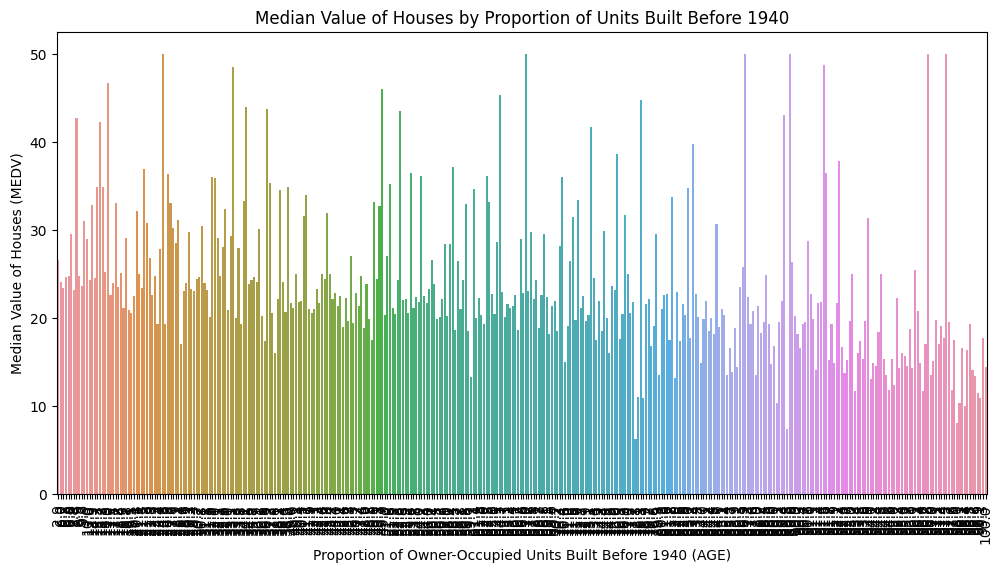

In [21]:
# Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

# Group the data by the proportion of owner-occupied units built before 1940
prop_before_1940 = df.groupby('AGE')['MEDV'].median().reset_index()

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='AGE', y='MEDV', data=prop_before_1940)
plt.xlabel('Proportion of Owner-Occupied Units Built Before 1940 (AGE)')
plt.ylabel('Median Value of Houses (MEDV)')
plt.title('Median Value of Houses by Proportion of Units Built Before 1940')
plt.xticks(rotation=90)
plt.show()



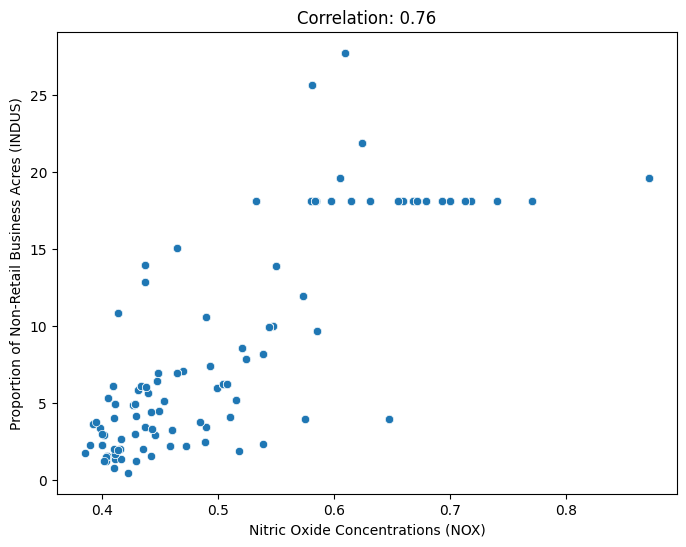

In [22]:
# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

# Calculate the correlation coefficient between NOX and INDUS
correlation_coefficient = np.corrcoef(df['NOX'], df['INDUS'])[0, 1]

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.title(f'Correlation: {correlation_coefficient:.2f}')
plt.show()



In [23]:
# Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

# Perform a linear regression
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['DIS']]  # Weighted Distance to Employment Centers
y = df['MEDV']    # Median Value of Houses

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

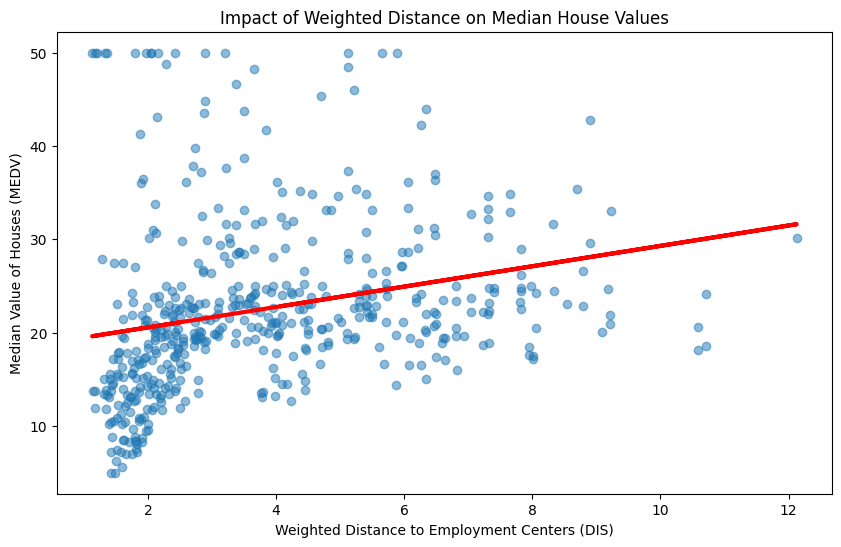

In [24]:

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=3)
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Houses (MEDV)')
plt.title('Impact of Weighted Distance on Median House Values')
plt.show()